In [1]:
import numpy as np
import pandas as pd

from PIL import Image

In [5]:
df_can = pd.read_excel("https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true",
             sheet_name='Canada by Citizenship',
              skiprows=range(20),
              skipfooter=2
             )

In [6]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_can = df_can.iloc[:195, :43]
df_can.shape

(195, 43)

In [8]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [11]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace = True)

df_can.rename(columns = {'OdName':'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace = True)


In [14]:
df_can.columns = list(map(str, df_can.columns))

df_can.set_index('Country', inplace = True)

df_can['Total'] = df_can.sum(axis=1)

years = list(map(str,range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


# Visualizing

In [15]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [17]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

mpl.__version__

'3.3.4'

#Waffle Charts

In [18]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [20]:
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value)/total_values) for value in df_dsn['Total']]

for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ':' + str(proportion))

Denmark:0.32255663965602777
Norway:0.1924094592359848
Sweden:0.48503390110798744


In [21]:
width = 40
height = 10

total_num_tiles = width * height

print('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [22]:
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ':' + str(tiles))

Denmark:129
Norway:77
Sweden:194


In [35]:
waffle_chart = np.zeros((height, width))

category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1
    
    if tile_index > sum(tiles_per_category[0:category_index]):
        category_index += 1
        
        waffle_chart[row, col]=category_index
        

In [36]:
waffle_chart

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   

<Figure size 432x288 with 0 Axes>

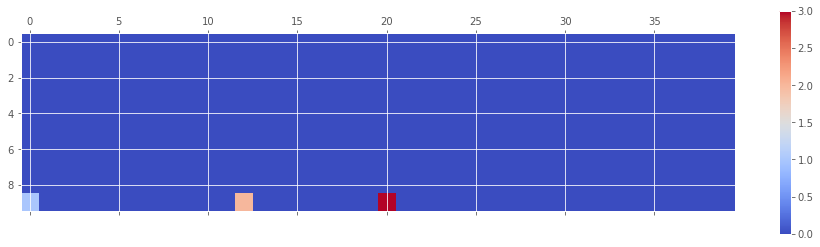

In [32]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 432x288 with 0 Axes>

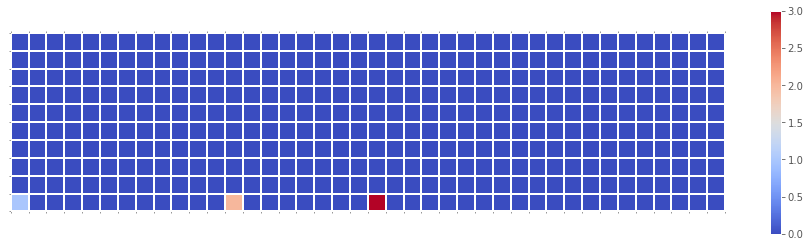

In [33]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
ax.set_yticks(np.arange(-.5, (height), 1), minor = True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

In [50]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
ax.set_yticks(np.arange(-.5, (height), 1), minor = True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) -1]

legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + '(' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label,str))
    
    
plt.legend(handles=legend_handles,
            loc='lower center',
            ncol=len(df_dsn.index.values),
            bbox_to_anchor=(0., -0.2, 0.95, .1)
           )

SyntaxError: positional argument follows keyword argument (<ipython-input-50-93778132408a>, line 24)

In [ ]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):
    
    total_values = sum(values)
    category_proportions = [(float(value)/total_values) for value in values]
    
    total_num_tiles = width * height
    print('Total number of tiles is ', total_num_tiles)
    
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]
    
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ':' + str(tiles))
        
     waffle_chart = np.zeros((height, width))

    category_index = 0
    tile_index = 0

    for col in range(width):
        for row in range(height):
            tile_index += 1
    
            if tile_index > sum(tiles_per_category[0:category_index]):
                category_index += 1
        
            waffle_chart[row, col]=category_index
     
    fig = plt.figure()

    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    ax = plt.gca()

    ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor = True)

    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    values_cumsum = np.cumsum(df_dsn['Total'])
    total_values = values_cumsum[len(values_cumsum) -1]

    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign =='%':
            label_str = category + '(' + str(values[i]) + value_sign +')'
        else:
            label_str = category + '(' + value_sign + str(values[i]) +')'
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label,str))
        
        
    plt.legend(
        handles=legend_handles,
        loc='lower center',
        ncol=len(df_dsn.index.values),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    

In [51]:
width = 40
height = 10

categories = df_dsn.index.values
values = df_dsn['Total']

colormap = plt.cm.coolwarm

In [53]:
create_waffle_chart(categories, values, height, width, colormap)

NameError: name 'create_waffle_chart' is not defined

#Word Cloud

Word Cloud

In [55]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported')

Wordcloud is installed and imported


In [57]:
from wordcloud import WordCloud, STOPWORDS

In [59]:
# !wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -0 alice_novel.txt

alice_novel = open('alice_novel.txt', 'r').read()

print('File downloaded and saved')

File downloaded and saved


In [60]:
stopwords = set(STOPWORDS)

In [61]:
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

alice_wc.generate(alice_novel)

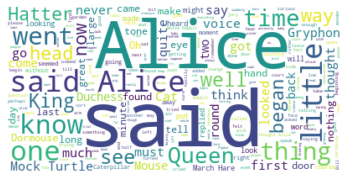

In [62]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [81]:
# !wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -0 alice_mask.png

alice_mask = np.array(Image.open('alice_mask.png'))

print('Image downloaded and saved!')

Image downloaded and saved!


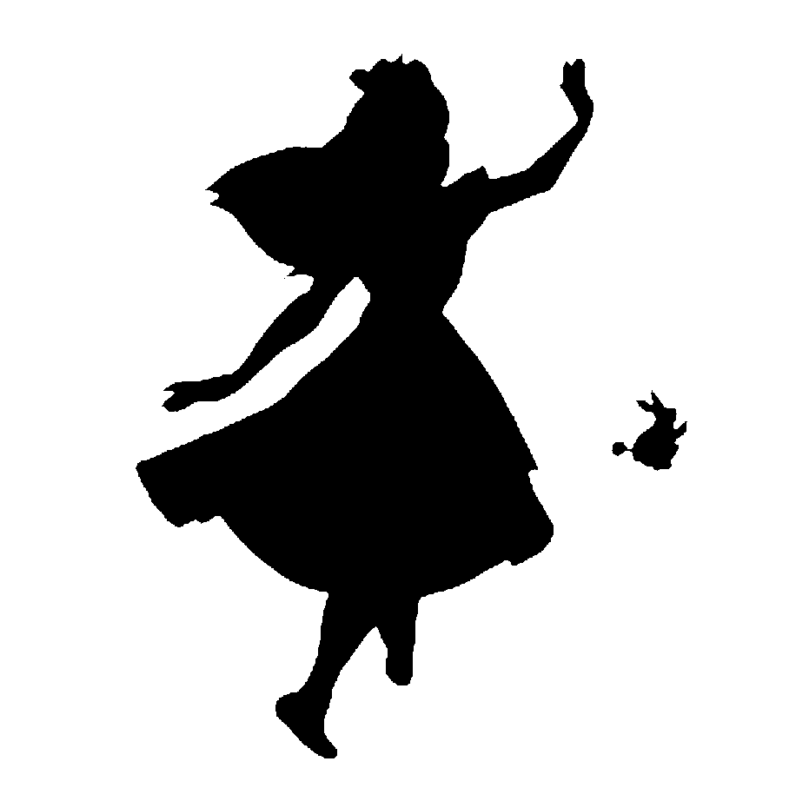

In [82]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [83]:
alice_wc = wordCloud(background_color='white', max_words=2000, mask=alice_mask,stopwords=stopwords)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'wordCloud' is not defined

# Regresion Plots

In [54]:
!pip install seaborn

import seaborn as sns

print('Seaborn installed and imported')

Seaborn installed and imported


In [84]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index = map(float,df_tot.index)

df_tot.reset_index(inplace=True)

df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


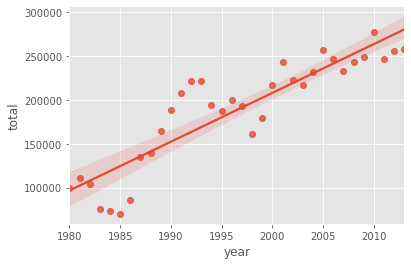

In [85]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

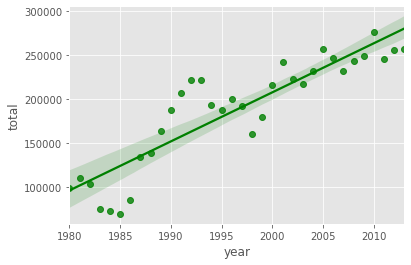

In [86]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

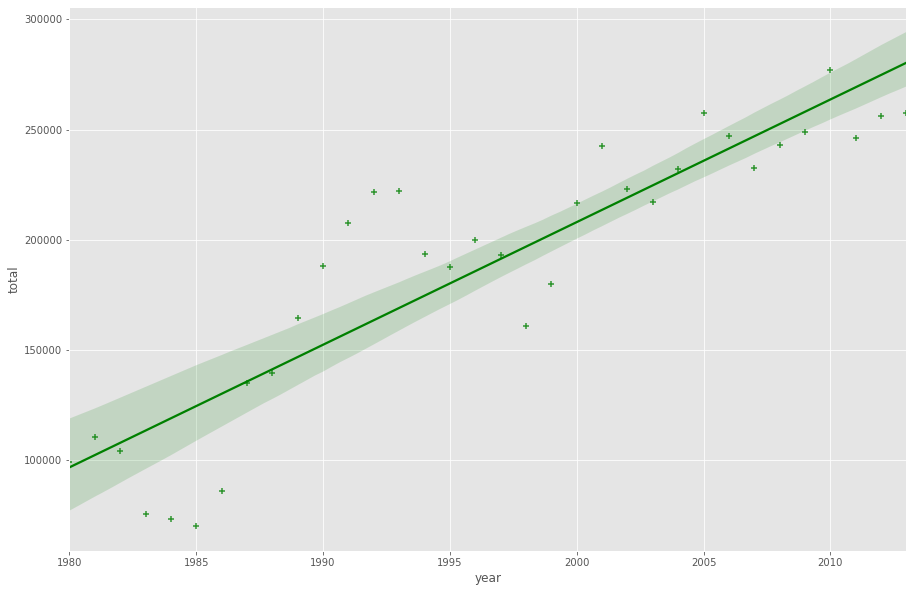

In [87]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

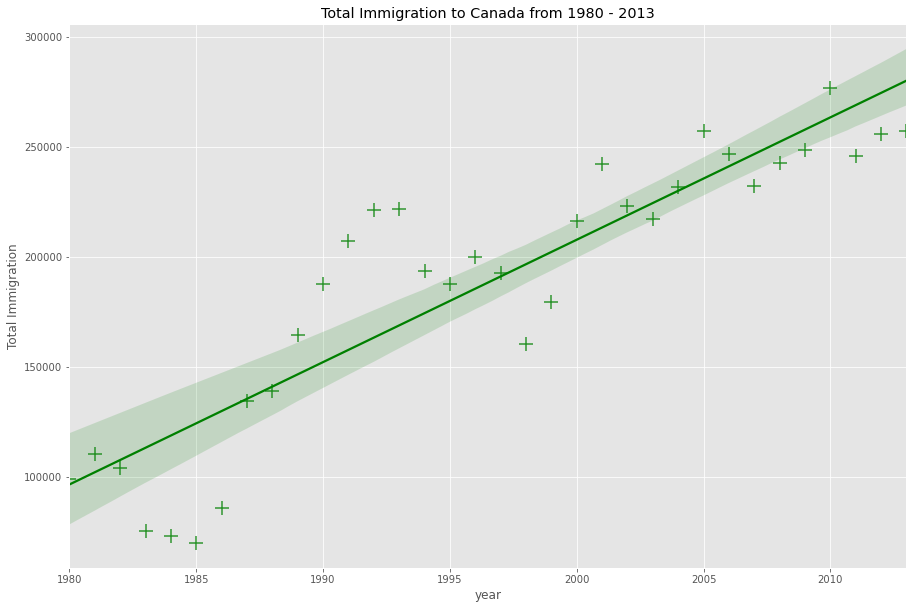

In [88]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')